<a href="https://colab.research.google.com/github/cseaboys/dl/blob/main/e4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [88]:
x = np.linspace(0, 100, 1000)
y = np.sin(x)

seq_len = 20
def create_dataset(series, seq_len):
    X, Y = [], []
    for i in range(len(series) - seq_len):
        X.append(series[i:i+seq_len])
        Y.append(series[i+seq_len])
    return np.array(X), np.array(Y)

X, Y = create_dataset(y, seq_len)

In [89]:
X = X[..., np.newaxis]
Y = Y[..., np.newaxis]

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

In [90]:
model = keras.Sequential([
    keras.Input(shape=(seq_len, 1)),
    keras.layers.SimpleRNN(32, activation='tanh'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')


In [91]:
model.fit(X_train, Y_train, epochs=20, batch_size=32)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1234
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0064
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.1857e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.3535e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0814e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8665e-04
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7640e-04
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9649e-04
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5454e-04
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1274e-04
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.2263e-05
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.6972e-05
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3620e-05
Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


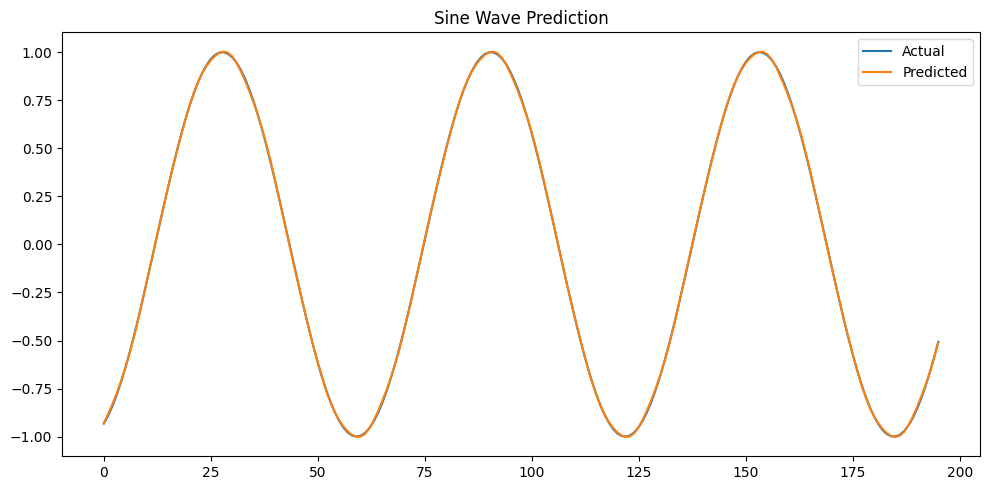

Actual: -0.9324  Predicted: -0.9292
Actual: -0.8916  Predicted: -0.8830
Actual: -0.8419  Predicted: -0.8311
Actual: -0.7837  Predicted: -0.7747
Actual: -0.7177  Predicted: -0.7131


In [93]:
pred = model.predict(X_test)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(range(len(Y_test)), Y_test.flatten(), label='Actual')

ax.plot(range(len(pred)), pred.flatten(), label='Predicted')

ax.legend()
ax.set_title("Sine Wave Prediction")

plt.tight_layout()
plt.show()

for i in range(5):
    print(f"Actual: {Y_test[i,0]:.4f}  Predicted: {pred[i,0]:.4f}")